In [44]:
import numpy as np
from collections import Counter
import itertools


class agent(object):
    #-----------------------------------------------------------------------------------------------#
    '''
    Agent Generation Mechanism. Extracts node attribute information from graph structure

    PARMS:
        node_number: int, assigning variable name to agents. Just use index position
        G: A networkx graph structure; G(V,E)
        env: an environment. Environment and Agents will communicate and pass back and forth state information
        seed: int, used for random number generator

                                env(G(V,E), Agents(G(V,E), env))
                                agents operate within the environment class.

    RETURNS:
        Graph with node attributes set
    '''
    #-----------------------------------------------------------------------------------------------#
    def __init__(self, node_number, G, env, seed=1):
        self.node_number = node_number
        self.nodeData = env.nodeData  #key (node number): (strategy, p_act, neighbors, degree)
        self.seed = np.random.seed(seed)
        self.letters = {
            'letters_initial': [],
            'letters_stolen': [],
            'letters_received': []
        }
        self.target_word = []
        self.corpus = env.corpus.copy()

    def get_init_hand(self, env):
        #-----------------------------------------------------------------------------------------------#
        '''
        '''
        #-----------------------------------------------------------------------------------------------#
        self.letters['letters_initial'] = np.random.choice(
            env.alphabet, 5)  #k is the length of each element in corpus
        env.current_state[self.node_number] = self.letters

    def get_target_word(self, env):
        #-----------------------------------------------------------------------------------------------#
        '''
        '''
        #-----------------------------------------------------------------------------------------------#
        matches = []
        for i in env.corpus_possible:
            matches.append(
                len(self.letters['letters_initial']) -
                len([j for j in self.letters['letters_initial'] if j in i]))
        self.target_word = env.corpus_possible[np.argmin(matches)]

    def _agent_form_word(self):
        #-----------------------------------------------------------------------------------------------#
        '''


        '''
        #-----------------------------------------------------------------------------------------------#
        pass

    def _agent_steal_letter(self):
        #-----------------------------------------------------------------------------------------------#
        '''


        '''
        #-----------------------------------------------------------------------------------------------#
        pass

    def _agent_pass_letter(self):
        #-----------------------------------------------------------------------------------------------#
        '''

        '''
        #-----------------------------------------------------------------------------------------------#
        pass

    def _agent_think(self):
        #-----------------------------------------------------------------------------------------------#
        '''


        '''
        #-----------------------------------------------------------------------------------------------#
        pass

    def take_action(self):
        #-----------------------------------------------------------------------------------------------#
        '''
        '''
        #-----------------------------------------------------------------------------------------------#
        for k, v in self.agents.items():
            node = k
            strategy = v.nodeData[k][0]
            p_act = v.nodeData[k][1]
            neighbors = v.nodeData[k][2]
            action_sampling = np.random.choice(self.action_space, p=p_act)

            if action_sampling == self.action_space[0]:  #form_word
                pass
            if action_sampling == self.action_space[1]:  #steal_letter
                pass
            if action_sampling == self.action_space[2]:  #pass_letter
                pass
            if action_sampling == self.action_space[3]:  #think / null action
                pass

In [45]:
from utils.helpers import possible_words


class environment(object):
    #-----------------------------------------------------------------------------------------------#
    '''
    '''
    #-----------------------------------------------------------------------------------------------#
    def __init__(self, G, t_max):

        self.G = G
        self.nodes = G.nodes
        self.edges = G.edges
        self.agents = []
        self.action_space = [
            'form_word', 'steal_letter', 'pass_letter', 'think'
        ]
        self.l_init_union = []
        self.corpus = np.loadtxt(fname='txt/five_letter_words.txt',
                                 dtype='str')
        self.corpus_possible = []
        self.alphabet = np.loadtxt(fname='txt/alphabet_english.txt',
                                   dtype='str')
        self.nodeData = {}
        self.current_state = {}  #at t
        self.historical_states = {}  #pop from current state at t+1
        self.words_formed = {}  #by player
        self.time = 0
        self.time_max = t_max

    def _getnodeData(self):
        #-----------------------------------------------------------------------------------------------#
        '''
        '''
        #-----------------------------------------------------------------------------------------------#
        for i, j in enumerate(self.G.nodes):
            self.nodeData[i] = (self.G.nodes[i]['atts'][0], self.G.nodes[i]['atts'][1],
                                [j for j in self.G.neighbors(i)], self.G.degree(i))



    def _find_cand_words(self):
        #-----------------------------------------------------------------------------------------------#
        '''
        '''
        #-----------------------------------------------------------------------------------------------#
        l_init_union = [[i for l in d.values() for i in l]
                        for d in self.current_state.values()
                        ]  #Compute Union over all init letter dist
        self.l_init_union = list(
            itertools.chain(*l_init_union))  #flatten to 1d array

        self.corpus_possible = possible_words(
            self.corpus, self.l_init_union)  #find C^possible

        print(
            f'total corpus size {len(self.corpus)}, total count of possible words {len(self.corpus_possible)}'
        )
        
    def _push_to_historical(self):
        #-----------------------------------------------------------------------------------------------#
        '''
        '''
        #-----------------------------------------------------------------------------------------------#
        self.historical_states[self.time] = self.current_state

    def _set_init_targets(self):
        #-----------------------------------------------------------------------------------------------#
        '''
        '''
        #-----------------------------------------------------------------------------------------------#
        [self.agents[i].get_target_word(self) for i in range(len(self.G.nodes))]
        self._push_to_historical() #push to historical states dict
        self.time += 1 #increment time counter

    def set_agents(self):
        #-----------------------------------------------------------------------------------------------#
        '''
        '''
        #-----------------------------------------------------------------------------------------------#
        #-------------------------------------------------
        #Create Agents
        #-------------------------------------------------
        agents = {}
        num_nodes = len(self.G.nodes)
        agent_names = [str(i) for i in range(len(self.G.nodes))]
        for i, j in enumerate(agent_names):
            agents[i] = agent(node_number=i, G = self.G, env = self)
        #-------------------------------------------------
        #Get init hand and pass back data to env.current_state
        #-------------------------------------------------
        print('agents passed into env')
        self.agents = agents
        
        [j.get_init_hand(self)
         for i, j in self.agents.items()]  #-> L_init(agent) & env.current_state
        print('all agents assigned letters_initial')

        print('searching for candidate words C^possible in C')
        self._find_cand_words(
        )  #Find Candidate Words - C^Possible, given init letter distr

        print('agents passed into env')
        print('init target words set locally. Time counter incremented by 1')
        self._set_init_targets()  #Set initial target word

    def set_env(self):
        #-----------------------------------------------------------------------------------------------#
        '''
        '''
        #-----------------------------------------------------------------------------------------------#
        assert len(self.alphabet) == 26, 'Alphabet size mismatch'
        self._getnodeData()
        self.set_agents()
        print('Environment set - > Graph Created. Node attributes assigned.')



    def reset_env(self):
        #-----------------------------------------------------------------------------------------------#
        '''
        '''
        #-----------------------------------------------------------------------------------------------#
        pass

  node       strat                 p_act     neighbors degree
0   v0  altruistic  [0.1, 0.2, 0.4, 0.3]        [1, 3]      2
1   v1  altruistic  [0.1, 0.2, 0.4, 0.3]  [0, 2, 3, 4]      4
2   v2     selfish  [0.1, 0.4, 0.2, 0.3]           [1]      1
3   v3     selfish  [0.1, 0.4, 0.2, 0.3]     [0, 1, 4]      3
4   v4  altruistic  [0.1, 0.2, 0.4, 0.3]        [1, 3]      2


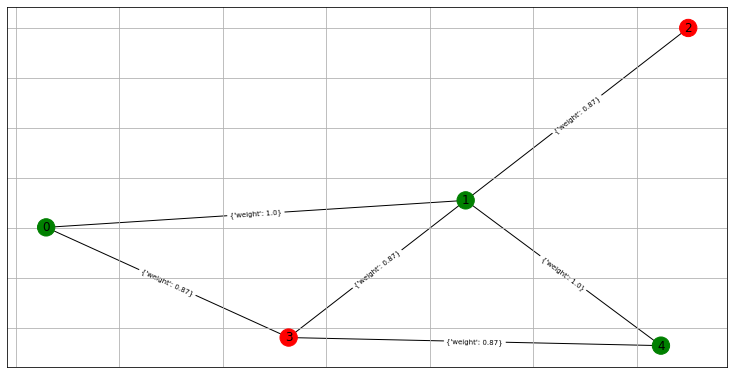

agents passed into env
all agents assigned letters_initial
searching for candidate words C^possible in C
total corpus size 5757, total count of possible words 605
agents passed into env
init target words set locally. Time counter incremented by 1
Environment set - > Graph Created. Node attributes assigned.


In [46]:
import os
from utils.graphinit import Network

#Graph Generation
num_nodes = 5
prob_edges = 0.5

#Node Attributes
pr_selfish = 0.5
pr_altrustic = 1 - pr_selfish
p_star = 0.20

G, table = Network(num_nodes, prob_edges, pr_selfish,
                  p_star).make_random_graph(plot=True, print_table=True)


env = environment(G, t_max= 400)
env.set_env()
#[print('node:', i,'target:', env.agents[i].target_word) for i,j in enumerate(env.agents)]


In [122]:
init_letters = agents[0].letters['letters_initial']
init_letters
env.corpus_possible

matches = []
for i in env.corpus_possible:
    matches.append(len(init_letters) - len([j for j in init_letters if j in i]))
    
target_word = env.corpus_possible[np.argmin(matches)]

'films'